In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#REPPU
mlat = np.linspace(53.1, 89.7, 30) #30 intervals between 53.1° to 89.7°
mlt= np.linspace(1.6, 357.6, 80) #80 intervals between 1.6° to 357.6°

#AMPERE
#mlat = np.linspace(40,90,50) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360, 24) #24 intervals between 0° to 360°

def calculate_delta(lat1, lon1, lat2, lon2):
    R_E = 6371.0 * 1e3 #meters

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    delta_x = (dlat / 360)*2*np.pi*R_E
    delta_y = (dlon / 360)*2*np.pi*R_E*np.sin(lat1_rad)

    return delta_x, delta_y

# Initialize a 50x24 grid for areas
areas = np.zeros((29, 79))

# Loop through latitude and longitude pairs to calculate areas
for i in range(len(mlat) - 1):
    for j in range(len(mlt) - 1):
        lat1, lat2 = mlat[i], mlat[i + 1]
        lon1, lon2 = mlt[j], mlt[j + 1]
        
        delta_x, delta_y = calculate_delta(lat1, lon1, lat2, lon2)
        
        area = delta_x * delta_y
        areas[i, j] = area

#divide area values by 1e3
areas = areas / 1e6

<Axes: >

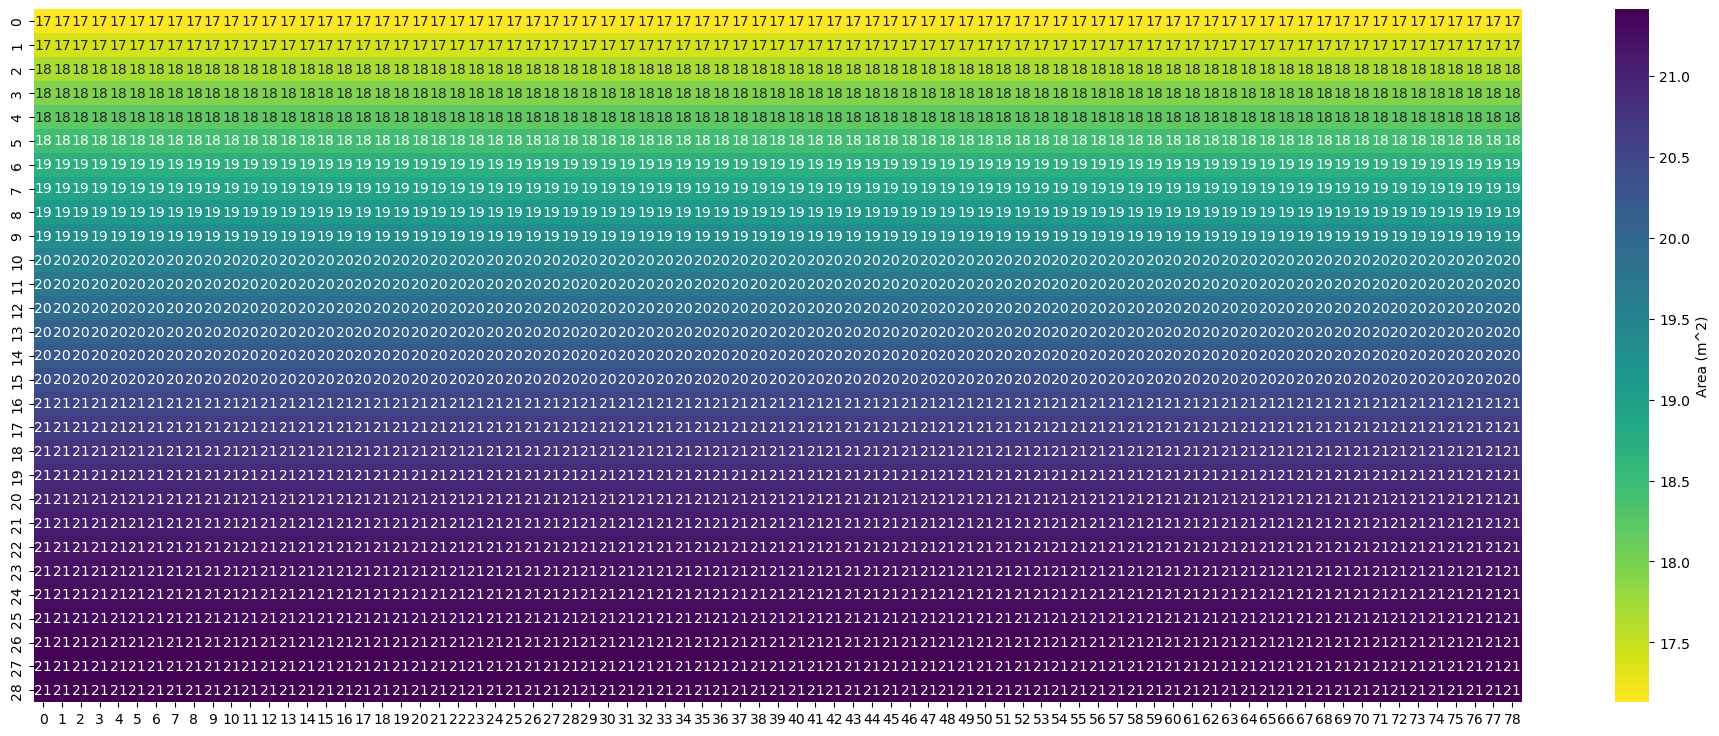

In [128]:
fig, ax = plt.subplots(figsize=(24, 9))
sns.heatmap(areas, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Area (m^2)'}, fmt='.0f', annot=True)
#set y ticks labels to be from 90 down to 40
#ax.set_yticklabels(np.flip(np.arange(41, 90, 1)))

[Text(0, 0.5, '89'),
 Text(0, 1.5, '88'),
 Text(0, 2.5, '87'),
 Text(0, 3.5, '86'),
 Text(0, 4.5, '85'),
 Text(0, 5.5, '84'),
 Text(0, 6.5, '83'),
 Text(0, 7.5, '82'),
 Text(0, 8.5, '81'),
 Text(0, 9.5, '80'),
 Text(0, 10.5, '79'),
 Text(0, 11.5, '78'),
 Text(0, 12.5, '77'),
 Text(0, 13.5, '76'),
 Text(0, 14.5, '75'),
 Text(0, 15.5, '74'),
 Text(0, 16.5, '73'),
 Text(0, 17.5, '72'),
 Text(0, 18.5, '71'),
 Text(0, 19.5, '70'),
 Text(0, 20.5, '69'),
 Text(0, 21.5, '68'),
 Text(0, 22.5, '67'),
 Text(0, 23.5, '66'),
 Text(0, 24.5, '65'),
 Text(0, 25.5, '64'),
 Text(0, 26.5, '63'),
 Text(0, 27.5, '62'),
 Text(0, 28.5, '61'),
 Text(0, 29.5, '60'),
 Text(0, 30.5, '59'),
 Text(0, 31.5, '58'),
 Text(0, 32.5, '57'),
 Text(0, 33.5, '56'),
 Text(0, 34.5, '55'),
 Text(0, 35.5, '54'),
 Text(0, 36.5, '53'),
 Text(0, 37.5, '52'),
 Text(0, 38.5, '51'),
 Text(0, 39.5, '50'),
 Text(0, 40.5, '49'),
 Text(0, 41.5, '48'),
 Text(0, 42.5, '47'),
 Text(0, 43.5, '46'),
 Text(0, 44.5, '45'),
 Text(0, 45.5, '44')

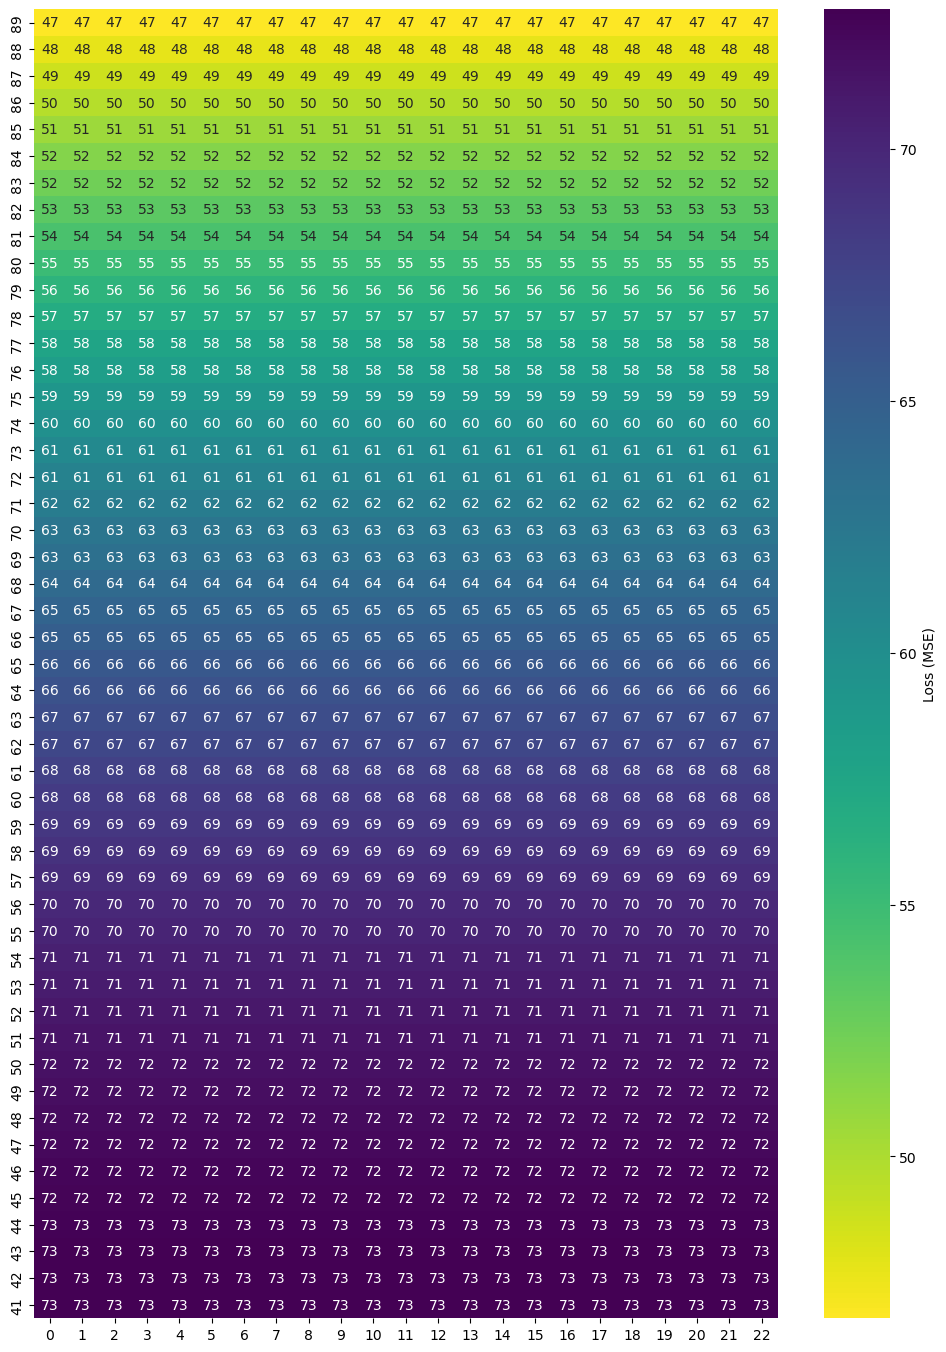

In [115]:
def weighted_loss(prediction, target, weights):
    loss = (prediction - target) ** 2 #MSE

    weighted_loss = loss * weights
    
    return weighted_loss

target = np.ones((49, 23))
prediction = target + 1.1
weights = areas

weight_loss = weighted_loss(prediction, target, weights)
fig, ax = plt.subplots(figsize=(12, 17))
sns.heatmap(weight_loss, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Loss (MSE)'}, fmt='.0f', annot=True)
ax.set_yticklabels(np.flip(np.arange(41, 90, 1)))
